# H + COOH Coverage

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

np.random.seed(1)

#### Load energy prediction models

In [19]:
#### Load models
#hollow_site_model = xgb.Booster({'nthread': 8})
#hollow_site_model.load_model("../models/"+"Hollow_site.model")

#on_top_site_model = xgb.Booster({'nthread': 8})
#on_top_site_model.load_model("../models/"+"on_top_site.model")

#models = {"H": hollow_site_model, "COOH": on_top_site_model}

#### Setup

In [11]:
# Size of the surface
dim_x, dim_y = 100, 100

# Metals
metals = ['Ag', 'Au', 'Cu', 'Pd', 'Pt']

# Other parameters (Coming)
# Voltages
start = 0.025
end = 1.05
scan_rate = 0.010

#### Run the simulation

In [7]:
surface = initialize_surface(dim_x, dim_y) # I should combine this with the occupance matrix in a dictionary

## Set a voltage
for voltage in voltage_sweep(start, end, scan_rate): # Approximates the desired scan rate
    
    ## Look through all sites
    
    ## Look through all hollow sites:
    for x, y in [(x, y) for x in range(dim_x) for y in range(dim_y)]: # I could randomise this, so I go through all sites in a random order
        ## What is the binding energy # With more adsorbates in future can be exchanged for a loop through the adsorbates
        ads = "H"
        # G = predict_G(ads = ads, site_x = x, site_y = y, surface = surface, voltage = voltage, models = models) ## A new function that wraps/uses the XGBoost model
        
        # I could REMOVE or ADD stuff right here for simplicity. I guess ideally I would add the most negative energy first, but if I just do small steps in voltage it shouldn't matter. I can avoid a huge complication by doing it like this
        surface = decision_to_leave()
    ## Look through all on top sites:
    for x, y in [(x, y) for x in range(dim_x) for y in range(dim_y)]:
        ads = "COOH"
        # G = predict_G(ads = ads, site_x = x, site_y = y, surface = surface, voltage = voltage, models = models)
    ## Look through all combined neighbour sites (Figure out the logic behind it)
    
    
## and predict all adsorbtion energies

## Log stats of the surface

Voltage: 0.025
Voltage: 0.03514851485148515
Voltage: 0.0452970297029703
Voltage: 0.05544554455445545
Voltage: 0.0655940594059406
Voltage: 0.07574257425742575
Voltage: 0.08589108910891091
Voltage: 0.09603960396039604
Voltage: 0.1061881188118812
Voltage: 0.11633663366336636
Voltage: 0.12648514851485151
Voltage: 0.13663366336633664
Voltage: 0.1467821782178218
Voltage: 0.15693069306930696
Voltage: 0.1670792079207921
Voltage: 0.17722772277227725
Voltage: 0.1873762376237624
Voltage: 0.19752475247524756
Voltage: 0.20767326732673272
Voltage: 0.21782178217821785
Voltage: 0.227970297029703
Voltage: 0.23811881188118816
Voltage: 0.2482673267326733
Voltage: 0.2584158415841585
Voltage: 0.26856435643564364
Voltage: 0.2787128712871288
Voltage: 0.28886138613861395
Voltage: 0.2990099009900991
Voltage: 0.3091584158415842
Voltage: 0.31930693069306937
Voltage: 0.3294554455445545
Voltage: 0.3396039603960397
Voltage: 0.34975247524752484
Voltage: 0.35990099009901
Voltage: 0.37004950495049516
Voltage: 0.380198

#### Plot the statistics

In [ ]:
# Make a nice plot showing how many neighbours, etc. there are at each voltage

#### Functions (To be moved to seperate .py file)

In [6]:
def initialize_surface(dim_x, dim_y): #Is still random - could be used with a seed in the name of reproduceability
    dim_z = 3
    surface_list = np.array([int(dim_x*dim_y*dim_z/len(metals))*[metals[metal_number]] for metal_number in range(len(metals))]).flatten() #Jack had a way shorter way of doing this, but I think it was random drawing instead of ensuring a perfectly even split
    np.random.shuffle(surface_list) #Shuffle list
    surf_atoms = np.reshape(surface_list, (dim_x, dim_y, dim_z)) #Reshape list to the
    surf_ads_top = np.reshape(["empty"]*dim_x*dim_y, (dim_x, dim_y))
    surf_ads_hol = np.reshape(["empty"]*dim_x*dim_y, (dim_x, dim_y))
    surf = {"atoms": surf_atoms, "ads_top": surf_ads_top, "ads_hol": surf_ads_top}
    return surf

def voltage_sweep(start, end, scan_rate):
    return np.linspace(start, end, int(np.abs(start - end) / scan_rate))

#def voltage_circle
#def voltage_up_down (All these could be worked into a single function)

def predict_G(ads, site_x, site_y, surface, voltage, models):
    # Make vectors from the surface structure
    if ads == "H":
        input_vector = hollow_site_vector(surface, site_x, site_y)
    if ads == "COOH":
        input_vector = on_top_site_vector(surface, site_x, site_y)
    
    # Use the gibbs free energy prediction model
    G = models[ads].predict(input_vector) #Check out, that this is the way to input
    
    # Apply voltage - this could be done with fewer lines, just saving the factor in front of voltage in a dict
    if ads == "H":
        G += 1*voltage #the energy is in eV, hence no e is required in the formula
    if ads == "COOH":
        G -= 1*voltage
    return G



array([0.025  , 0.28125, 0.5375 , 0.79375, 1.05   ])

In [30]:
np.abs(start - end) / number of numbers = scan_rate

0.20500000000000002

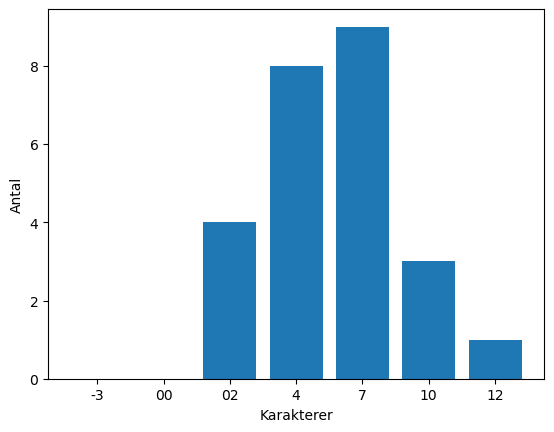

In [18]:
# Hurtig fordeling

karakterer_dict = {"-3":0, "00":0, "02":4, "4":8, "7":9, "10":3, "12":1}

keys = karakterer_dict.keys()
values = karakterer_dict.values()

plt.bar(keys, values)
plt.xlabel("Karakterer")
plt.ylabel("Antal")
plt.show()